In [1]:
import os
import re
import json
import requests
from spotify_client import *

In [2]:
client_id = "85434f2d38ba4509924f3940ec3b40ed"
client_secret = "3bb1e3237c334e95b1db5244740d2fc0"

In [3]:
#Initialize a client that is connected and can be used for queries etc.
spotify = SpotifyAPI(client_id, client_secret)

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import sys

In [5]:
SPOTIPY_CLIENT_ID='85434f2d38ba4509924f3940ec3b40ed'
SPOTIPY_CLIENT_SECRET='3bb1e3237c334e95b1db5244740d2fc0'

## Step 1 : Find a Soundtrack to the Script

`In: Modified File Name   
Out: Album Id`

In [4]:
# sub "-" with " " , removed .txt , added Original Soundtrack for search
title = "Chronicles of Narnia The Lion, the Witch and the Wardrobe Original Motion Picture Soundtrack"

In [54]:
spotify_search = spotify.search(title,search_type="album")
result = spotify_search['albums']['items']

In [56]:
album_id = spotify_search['albums']['items'][0]['id']
album_id

'01wn5MrXTUWjdYTLYC2wqU'

In [48]:
# Using Spotipy Library
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET))
spotipy_result = sp.search(title, type="album")
print(spotipy_result)

{'albums': {'href': 'https://api.spotify.com/v1/search?query=Chronicles+of+Narnia+The+Lion%2C+the+Witch+and+the+Wardrobe+Original+Motion+Picture+Soundtrack&type=album&offset=0&limit=10', 'items': [{'album_type': 'compilation', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1BxqJ6pOCi8mkSjCbFYjpW'}, 'href': 'https://api.spotify.com/v1/artists/1BxqJ6pOCi8mkSjCbFYjpW', 'id': '1BxqJ6pOCi8mkSjCbFYjpW', 'name': 'Harry Gregson-Williams', 'type': 'artist', 'uri': 'spotify:artist:1BxqJ6pOCi8mkSjCbFYjpW'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW

In [53]:
spotipy_album_id = spotipy_result['albums']['items'][0]['id']
spotipy_album_id

'01wn5MrXTUWjdYTLYC2wqU'

## Step 2: Get the tracks

`In: Album Id   
Out: List of Track_Ids`

In [64]:
track_list = []
for item in sp.album_tracks(spotipy_album_id)['items']:
    track_list.append(item['id'])

In [65]:
track_list

['0sr5SHNfmxHGo34J17u7v8',
 '7JJp9nIoSFSdPbFYx0gx2C',
 '4KgOHADtS4HX5Dhkyyr1Ew',
 '0A8Mz80e71zqcEznJLniXS',
 '03pWkKJjo8ATe0z4SWGzyd',
 '3BrmHJDkqSJojbdlvhT0JZ',
 '1QfzxPGPepFcFNnvC248JB',
 '3Z1m5k8QVvghnFTDbrs7z2',
 '2lda3NIlkKYkZsU5eai2Ve',
 '7l3CJkD5hy5J27sFfH0rkT',
 '3svfTMSnUTPUxNYWiYMCNj',
 '1ze3GTOVgAG5xLVrvcEoUS',
 '7zY46aSULMG2pDG2fMlaI7',
 '6nd0jgRNWjsVSbdCW9I6ux',
 '0pVtVwvDuBnfsBdMib9kKo',
 '77wDOEKcTwrZ9VAKUK5MAP',
 '3w1v4TzxqkAjLZJRVxWTPA']

## Step 3 Get Audio Features for Tracks

`In: List of Track_IDs   
Out: List of Tracks plus their Audio Features

In [81]:
narnia_audiofeatures = sp.audio_features(track_list)

In [83]:
narnia_audiofeatures[:2]

[{'danceability': 0.444,
  'energy': 0.501,
  'key': 8,
  'loudness': -13.111,
  'mode': 1,
  'speechiness': 0.0373,
  'acousticness': 0.304,
  'instrumentalness': 0.961,
  'liveness': 0.192,
  'valence': 0.12,
  'tempo': 126.076,
  'type': 'audio_features',
  'id': '0sr5SHNfmxHGo34J17u7v8',
  'uri': 'spotify:track:0sr5SHNfmxHGo34J17u7v8',
  'track_href': 'https://api.spotify.com/v1/tracks/0sr5SHNfmxHGo34J17u7v8',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0sr5SHNfmxHGo34J17u7v8',
  'duration_ms': 152507,
  'time_signature': 4},
 {'danceability': 0.161,
  'energy': 0.232,
  'key': 4,
  'loudness': -17.383,
  'mode': 0,
  'speechiness': 0.0398,
  'acousticness': 0.811,
  'instrumentalness': 0.709,
  'liveness': 0.12,
  'valence': 0.0355,
  'tempo': 151.813,
  'type': 'audio_features',
  'id': '7JJp9nIoSFSdPbFYx0gx2C',
  'uri': 'spotify:track:7JJp9nIoSFSdPbFYx0gx2C',
  'track_href': 'https://api.spotify.com/v1/tracks/7JJp9nIoSFSdPbFYx0gx2C',
  'analysis_url': 'https://a

## Step 4 Extract and Visualize single Features

**Valence Scores**

> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [79]:
narnia_valence = []
for track in narnia_audiofeatures:
    narnia_valence.append(track['valence'])

In [84]:
narnia_valence

[0.12,
 0.0355,
 0.0327,
 0.0397,
 0.0322,
 0.0301,
 0.0387,
 0.037,
 0.0377,
 0.0316,
 0.0341,
 0.141,
 0.0367,
 0.0951,
 0.432,
 0.1,
 0.236]

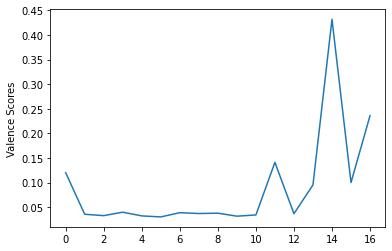

In [87]:
import matplotlib.pyplot as plt
plt.plot(narnia_valence)
plt.ylabel('Valence Scores')
plt.show()

**Energy Scores**

> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

In [88]:
narnia_energy = []
for track in narnia_audiofeatures:
    narnia_energy.append(track['energy'])

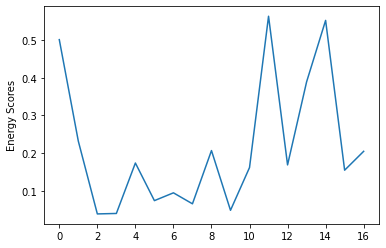

In [120]:
plt.plot(narnia_energy)
plt.ylabel('Energy Scores')
plt.show()

In [108]:
narnia_script = open("imsdb_download_all_scripts-main/scripts/Chronicles-of-Narnia-The-Lion,-the-Witch-and-the-Wardrobe.txt","r")

#for line in narnia_script:
#    print(line)

### Romeo & Juliet Audiobook Soundtrack

In [115]:
track_list_romeo = []
for item in sp.album_tracks('4UJ6QqONJ24k76i043RfiG')['items']:
    track_list_romeo.append(item['id'])

In [116]:
romeo_audiofeatures = sp.audio_features(track_list_romeo)

In [117]:
romeo_valence = []
for track in romeo_audiofeatures:
    romeo_valence.append(track['valence'])

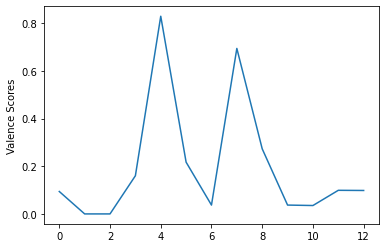

In [118]:
plt.plot(romeo_valence)
plt.ylabel('Valence Scores')
plt.show()

In [119]:
romeo_energy = []
for track in romeo_audiofeatures:
    romeo_energy.append(track['energy'])

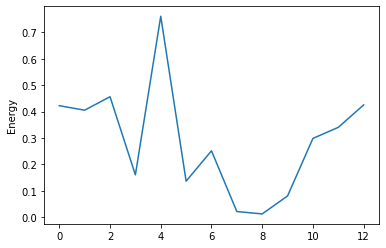

In [122]:
plt.plot(romeo_energy)
plt.ylabel('Energy')
plt.show()

### Lord of the Rings Teil 1

In [123]:
lotr_album_id = '04rz93AqGy9JduzV3K81Dh'

In [124]:
track_list_lotr = []
for item in sp.album_tracks(lotr_album_id)['items']:
    track_list_lotr.append(item['id'])
    
lotr_audiofeatures = sp.audio_features(track_list_lotr)

lotr_valence = []
for track in lotr_audiofeatures:
    lotr_valence.append(track['valence'])

lotr_energy = []
for track in lotr_audiofeatures:
    lotr_energy.append(track['energy'])   

In [165]:
normalized_xaxis = [x/len(lotr_energy) for x in range(len(lotr_energy))]

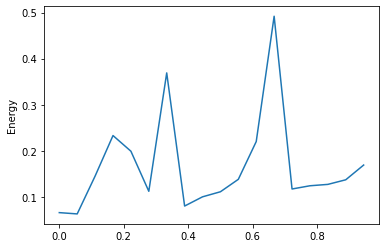

In [169]:
plt.plot(normalized_xaxis,lotr_energy)
plt.ylabel('Energy')
plt.show()

In [131]:
tids = track_list_lotr

In [132]:
max_tracks_per_call = 50

In [141]:
song_list = []

for start in range(0, len(tids), max_tracks_per_call):
        results = sp.tracks(tids[start: start + max_tracks_per_call])
        for track in results['tracks']:
            print(track['name'])
            song_list.append(track['name'])

The Prophecy
Concerning Hobbits
The Shadow of the Past
The Treason of Isengard
The Black Rider
At the Sign of the Prancing Pony
A Knife in the Dark
Flight to the Ford
Many Meetings
The Council of Elrond (feat. "Aniron") [Theme for Aragorn and Arwen]
The Ring Goes South
A Journey in the Dark
The Bridge of Khazad Dum
Lothlorien (feat. "Lament for Gandalf")
The Great River
Amon Hen
The Breaking of the Fellowship (feat. "In Dreams")
May It Be


In [140]:
#lotr_valence

In [144]:
songs_valence = zip(song_list, lotr_valence, lotr_energy)

In [145]:
print(tuple(songs_valence))

(('The Prophecy', 0.0317, 0.0657), ('Concerning Hobbits', 0.175, 0.0629), ('The Shadow of the Past', 0.0353, 0.145), ('The Treason of Isengard', 0.0664, 0.233), ('The Black Rider', 0.305, 0.199), ('At the Sign of the Prancing Pony', 0.0628, 0.112), ('A Knife in the Dark', 0.0431, 0.369), ('Flight to the Ford', 0.0427, 0.08), ('Many Meetings', 0.0359, 0.1), ('The Council of Elrond (feat. "Aniron") [Theme for Aragorn and Arwen]', 0.039, 0.111), ('The Ring Goes South', 0.0798, 0.138), ('A Journey in the Dark', 0.0373, 0.22), ('The Bridge of Khazad Dum', 0.0365, 0.492), ('Lothlorien (feat. "Lament for Gandalf")', 0.0328, 0.117), ('The Great River', 0.0343, 0.124), ('Amon Hen', 0.0381, 0.127), ('The Breaking of the Fellowship (feat. "In Dreams")', 0.0465, 0.137), ('May It Be', 0.0547, 0.169))


In [153]:
selected_features = []
for track in lotr_audiofeatures:
    ft = [track['valence'],track['energy'],track['loudness'],track['tempo']]
    selected_features.append(ft)

In [154]:
selected_features

[[0.0317, 0.0657, -21.943, 177.549],
 [0.175, 0.0629, -21.524, 104.311],
 [0.0353, 0.145, -18.315, 144.708],
 [0.0664, 0.233, -16.068, 83.259],
 [0.305, 0.199, -14.744, 86.729],
 [0.0628, 0.112, -17.863, 175.844],
 [0.0431, 0.369, -15.537, 75.039],
 [0.0427, 0.08, -17.931, 108.629],
 [0.0359, 0.1, -20.607, 64.791],
 [0.039, 0.111, -20.031, 83.933],
 [0.0798, 0.138, -14.987, 80.007],
 [0.0373, 0.22, -17.94, 83.661],
 [0.0365, 0.492, -13.19, 84.204],
 [0.0328, 0.117, -20.316, 86.378],
 [0.0343, 0.124, -18.094, 77.278],
 [0.0381, 0.127, -17.731, 81.303],
 [0.0465, 0.137, -20.553, 78.577],
 [0.0547, 0.169, -17.88, 132.925]]

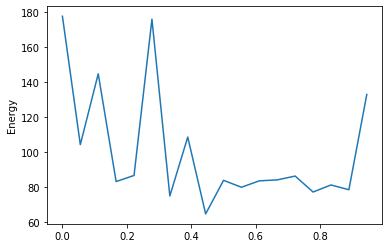

In [176]:
onefeaturelist = [item[3] for item in selected_features]
plt.plot(normalized_xaxis,onefeaturelist)
plt.ylabel('Energy')
plt.show()

## Next step(s): Create Sentiment Arc based on Script

- Extract Dialogues from Text 
- Save on different levels
- Run Sentiment Analysis to get Valence and Arousal Scores
- Plot the Arcs

In [1]:
# Read in the file
with open('imsdb_download_all_scripts-main/scripts/Lord-of-the-Rings-Fellowship-of-the-Ring,-The.txt', 'r') as script: # Open the file
    lotr_script = script.read()

In [2]:
#print(lotr_script)

In [3]:
import spacy

In [4]:
nlp = spacy.load('en_core_web_md')

In [5]:
doc = nlp(lotr_script)

In [6]:
for d in doc[100:150]:
    print(d)

,
I
smell
it

          
in
the
air
...
Much
that
once
was
is
lost
,

          
for
none
now
live
who
remember
it
.



SUPER
:
THE
LORD
OF
THE
RINGS



EXT
.
PROLOGUE
--
DAY



IMAGE
:
FLICKERING
FIRELIGHT
.
The
NOLDORIN
FORGE
in
EREGION


In [7]:
import pandas as pd

In [8]:
vad_df = pd.read_csv("NRC-VAD-Lexicon.txt", sep="\t")
vad_df

,Word,Valence,Arousal,Dominance
0,aaaaaaah,0.479,0.606,0.291
1,aaaah,0.520,0.636,0.282
2,aardvark,0.427,0.490,0.437
3,aback,0.385,0.407,0.288
4,abacus,0.510,0.276,0.485
...,...,...,...,...
20002,zoo,0.760,0.520,0.580
20003,zoological,0.667,0.458,0.492
20004,zoology,0.568,0.347,0.509
20005,zoom,0.490,0.520,0.462


In [9]:
word_valence = dict(zip(vad_df["Word"], vad_df["Valence"]))
word_arousal = dict(zip(vad_df["Word"], vad_df["Arousal"]))

In [10]:
import numpy as np

Method works with a list of Strings:

In [45]:
def text_valence(text, agg=sum):
    return agg([word_valence.get(t.lemma_, 0) for t in nlp(text)])

In [13]:
import re

In [25]:
split_script = re.split("\n\n",lotr_script)

In [28]:
for s in split_script[:10]:
    print(s,"\n")


BLACK SCREEN 

SUPER: New Line Cinema Presents 

SUPER: A Wingnut Films Production 

BLACK CONTINUES... ELVISH SINGING....A WOMAN'S VOICE IS
whispering, tinged with SADNESS and REGRET: 

                    GALADRIEL (V.O.)
              (Elvish: subtitled)
          "I amar prestar sen: han mathon ne nen,
          han mathon ne chae...a han noston ned
          wilith."
              (English:)
          The world is changed: I feel it in the
          water, I feel it in the earth, I smell it
          in the air...Much that once was is lost,
          for none now live who remember it. 

SUPER: THE LORD OF THE RINGS 

EXT. PROLOGUE -- DAY 

IMAGE: FLICKERING FIRELIGHT. The NOLDORIN FORGE in EREGION.
MOLTEN GOLD POURS from the lip of an IRON LADLE. 

                    GALADRIEL (V.O.)
          It began with the forging of the Great
          Rings. 

IMAGE: THREE RINGS, each set with a single GEM, are received
by the HIGH ELVES-GALADRIEL, GIL-GALAD and CIRDAN. 



In [30]:
split_script[0]

'\nBLACK SCREEN'

In [39]:
stringmatch = re.match("A-Z","BLACK")

In [43]:
type(stringmatch)

NoneType

In [44]:
testtext= "The world is changed: I feel it in the water, I feel it in the earth, I smell it in the air...Much that once was is lost, for none now live who remember it."

In [49]:
for s in split_script[:10]:
    print(text_valence(s))

0.996
2.4850000000000003
1.5380000000000003
3.9259999999999997
9.857000000000001
0.8440000000000001
0.7190000000000001
4.986999999999999
0.677
5.806


In [52]:
word_valence['smell']

0.51

In [53]:
len(split_script)

1966

In [54]:
re.sub("[A-Z]","","BLACKb")

'b'

In [64]:
scores = []

for s in split_script:
    scores.append(text_valence(re.sub("[A-Z][A-Z]+","",s)))

In [65]:
scores[:10]

[0,
 0.7240000000000001,
 0.6940000000000001,
 0.959,
 9.857000000000001,
 0,
 0,
 0.541,
 0.677,
 2.2220000000000004]

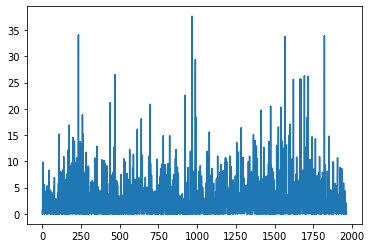

In [70]:
plt.plot(scores)
plt.show()

In [67]:
import matplotlib.pyplot as plt